In [1]:
#Imports
import sys
import os
import numpy as np
from ast import literal_eval
import pandas as pd
import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor
from collections import Counter

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import tables
import time
from scipy import stats

import pdb

In [2]:
def read_fasta(fasta_file):
    '''Read fasta file
    '''

    sequence = '' #Store sequence

    with open(fasta_file) as file:
        for line in file:
            line = line.rstrip() #remove \n
            if line[0] == '>':
                uid = line[1:]
            else:
                sequence += line

    return uid, sequence



In [3]:
fasta_files = glob.glob('/home/pbryant/data/CATH/h_grouped/fasta_below95/*/*.fa')

sequences = []
uids = []
H_groups = []

for fasta_file in fasta_files:
    H_groups.append(fasta_file.split('/')[-2])
    uid, sequence = read_fasta(fasta_file)
    uids.append(uid)
    sequences.append(sequence)


In [4]:
df = pd.DataFrame(list(zip(H_groups, uids, sequences)), 
               columns =['H_group', 'uid', 'sequence']) 
df.head

<bound method NDFrame.head of              H_group      uid  \
0        3.30.40.130  2m13A00   
1       3.90.1360.10  3iu0A00   
2       1.10.10.2140  2z1dA03   
3       1.10.10.2600  4bqqB02   
4       1.10.10.2600  4kisA01   
5       3.30.450.340  3p01A02   
6      1.20.120.1500  3iynN01   
7       3.30.1230.10  1g2rA00   
8      3.30.1490.340  3c0fB00   
9        2.10.150.10  4ac7B00   
10       2.10.150.10  3qgaA02   
11       2.10.150.10  1e9yA01   
12       2.10.150.10  4z42B00   
13       2.10.150.10  4ep8B00   
14       2.10.150.10  4g7eB03   
15       2.10.150.10  4gy7A03   
16       2.60.260.60  3akoD00   
17      2.60.40.3430  4apxB01   
18     1.20.1440.280  4g75A01   
19     1.20.1440.280  2xmxA01   
20       3.10.640.10  2ot9A01   
21       3.10.640.10  2g3wA00   
22       3.10.640.10  3c0uA00   
23        1.20.58.70  2dnxA00   
24        1.20.58.70  4jehB00   
25        1.20.58.70  1fioA00   
26        1.20.58.70  2xheB01   
27        1.20.58.70  5m4yA00   
28        1.2

6002
3183


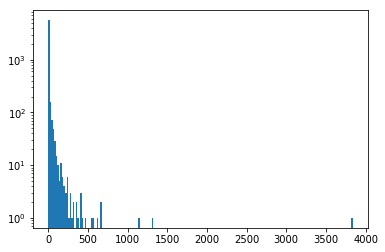

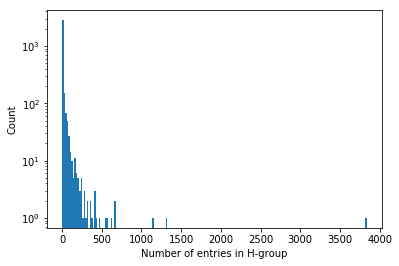

In [17]:
h_counts = Counter([*df['H_group']])
print(len([*h_counts.keys()]))
above_2 = []
counts_above_2 = []
for key in h_counts.keys():
    if h_counts[key] >1:
        above_2.append(key)
        counts_above_2.append(h_counts[key])
print(len(above_2))
plt.hist([*h_counts.values()], bins = 200, log = True)
plt.show()
plt.hist(counts_above_2, bins = 200, log = True)
plt.xlabel('Number of entries in H-group')
plt.ylabel('Count')
plt.show()

In [9]:
above_2_df = df[df['H_group'].isin(above_2)]
print(len(df), len(above_2_df))
above_2_df.to_csv('above2.csv')

54271 51452


In [ ]:
with open('above2.txt', 'w') as file:
    for group in above_2:
        file.write(group+'\n')